In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us use the following plotting styles

In [ ]:
plt.style.use('fivethirtyeight')
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Bar plot (show a numerical comparison across different categories in data visualization). In the following data set, I calculated and visualized: 

*  The average alcohol amounts (per countries) (servings and liters) for each continent 
*  The average beer and spirit serving in EU and AF




In [238]:
from numpy.ma.core import count
# Read in the drinks data as a Pandas DataFrame
url = 'https://gist.githubusercontent.com/aegorenkov/f7f0f8d6e9cc17ca9774572e224e2ad1/raw/9429430ee053bc796d694ed7e88b333a54f3e287/drinks.csv'
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
drinks = pd.read_csv(url, header=0, na_filter=False)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


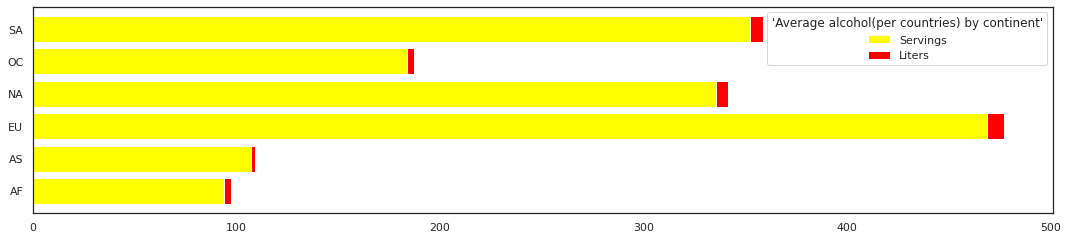

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


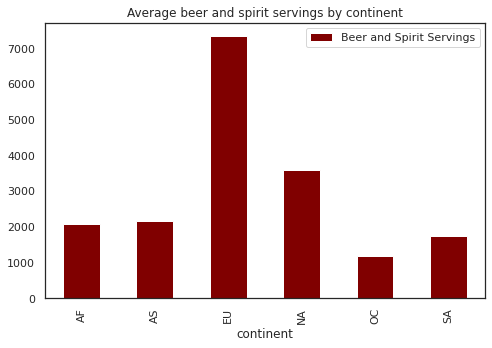

In [326]:

#1: The average alcohol amounts for each continent

#New df showing total alcohol consumtion and amount of countries in each continent, then average 
a = drinks.groupby(['continent'],axis = 0, as_index = False).sum()
b = drinks.groupby(['continent'],axis = 0, as_index = False).count()
df = pd.concat([a['continent'],
     #mean = servings/no. of countries
     a[['beer_servings','spirit_servings','wine_servings']].astype(float).sum(1)/ b['country'], 
     a['total_litres_of_pure_alcohol']/b['country']], axis=1) 
dict = {0:'Servings', 1:'Liters'}
df.rename (columns = dict, inplace = True)
#Plot
plt.rcParams["figure.figsize"] = [15, 3.50]
plt.rcParams["figure.autolayout"] = True
p1 = plt.barh(df['continent'], df['Servings'], color="yellow")
p2 = plt.barh(df['continent'], df['Liters'], left=df['Servings'], color="red")
plt.legend([p1, p2], ["Servings", "Liters"], title="'Average alcohol(per countries) by continent'", loc="upper right")
plt.show()

#2: The average beer and spirit servings in EU and AF
df2 = pd.concat([a['continent'],
                 a.drop(['total_litres_of_pure_alcohol','wine_servings'], 1).mean(axis = 1)], axis = 1)
dict = {0:'Beer and Spirit Servings'}
df2.rename (columns = dict, inplace = True)
df2.plot.bar (x = 'continent', color = 'maroon',figsize = (7, 5),width = 0.5,title = 'Average beer and spirit servings by continent')



Scatter plots are used to display the relationship between two numerical variables in data visualization. Using the following mpg dataset from Seaborn's data repository, I created a scatter plot of miles per gallon against against horsepower. In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding. Also, transparency of a plot is managed by the parameter alpha between 0 an 1. 

In [ ]:
import seaborn as sns
sns.set(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
mpg.head()

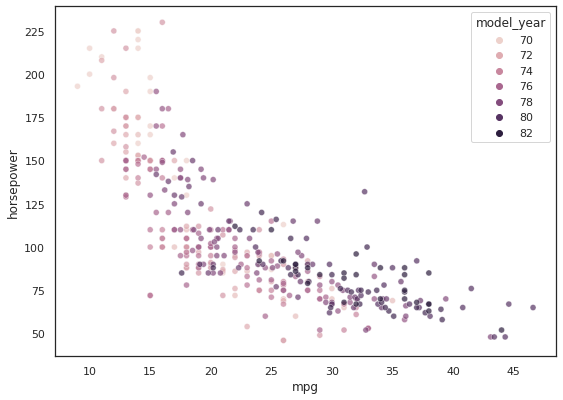

In [252]:
# Answer:

sns.scatterplot(data=mpg, x="mpg", y="horsepower", hue="model_year", alpha = 0.7)

Exploratory Data Analysis (EDA). It is a process of exploring patterns, relationship, or anomalies to guide us in our next steps in our data analysis. One of the important tools that we utilize in EDA is the pair plots - a scatterplot matrix. To explore the following socioeconomic data set obtained from Gapminder (https://www.gapminder.org/data/), I utilize the hue parameter in pairplots. 


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/harslan/Data/master/gapminder_data.csv'
data = pd.read_csv(url)

In [ ]:
# Import Seaborn visualization library
import seaborn as sns
sns.set(style="white")

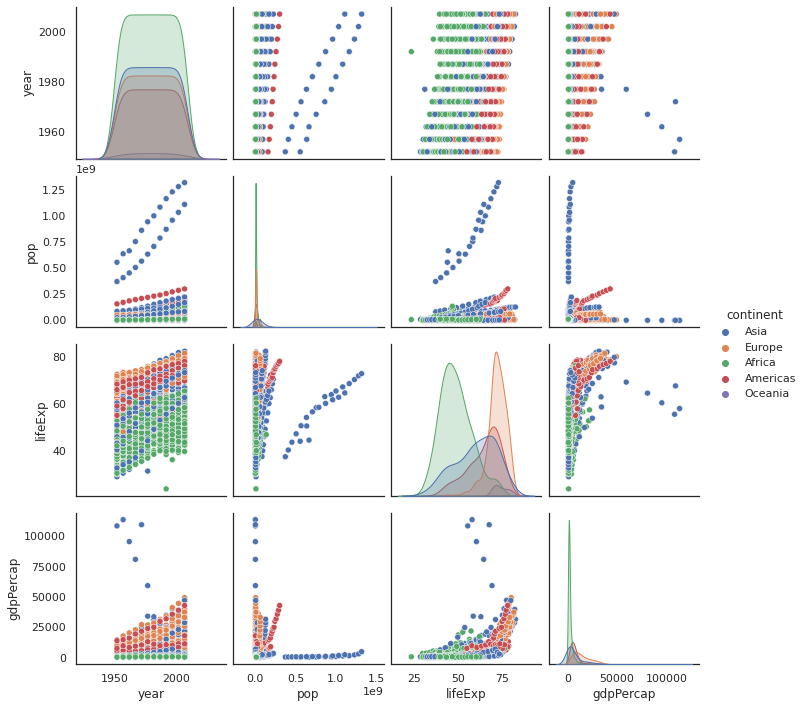

In [ ]:
# Answer:
sns.pairplot(data, hue = 'continent')
